Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ add_1 (Add)                     │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_1           │ (None, 200, 64)        │        41,792 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,017 (2.62 MB)

 Trainable params: 686,017 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 126s 383ms/step - accuracy: 0.6824 - loss: 0.5609 - val_accuracy: 0.8816 - val_loss: 0.2906
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 390ms/step - accuracy: 0.9179 - loss: 0.2164 - val_accuracy: 0.8758 - val_loss: 0.2964
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 392ms/step - accuracy: 0.9444 - loss: 0.1513 - val_accuracy: 0.8694 - val_loss: 0.3642
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 386ms/step - accuracy: 0.9679 - loss: 0.1008 - val_accuracy: 0.8636 - val_loss: 0.3871
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 397ms/step - accuracy: 0.9748 - loss: 0.0804 - val_accuracy: 0.8594 - val_loss: 0.4690
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8372 - loss: 0.5154
測試準確率：0.835


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas

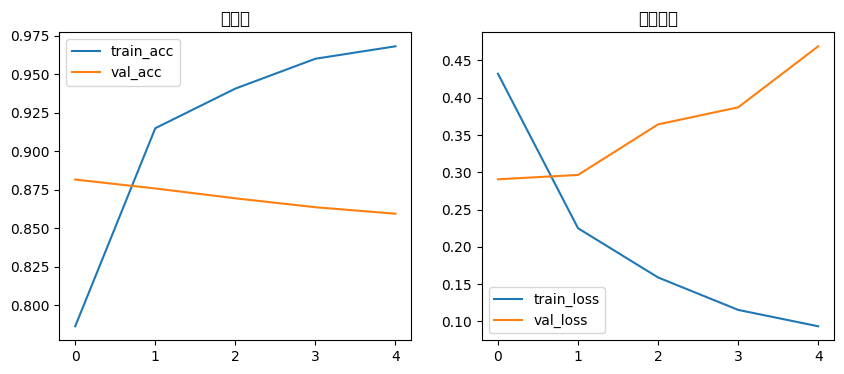

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# 超參數設定
vocab_size = 10000
maxlen = 200
embedding_dim = 64

# 載入 IMDB 資料
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# 🧱 2. 建立 Transformer Encoder 模組
# 自定義 Multi-Head Self-Attention 模組
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# 🧮 3. 建立 Transformer 模型
embed_dim = 64   # Embedding 向量維度
num_heads = 2    # 注意力頭數
ff_dim = 64      # Feed-Forward 網路維度

inputs = layers.Input(shape=(maxlen,))
embedding_layer = layers.Embedding(vocab_size, embed_dim)(inputs)

# 加入位置編碼 (Positional Encoding)
positions = tf.range(start=0, limit=maxlen, delta=1)
positions = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)(positions)
x = embedding_layer + positions

# 加入 Transformer Encoder
encoder = TransformerEncoder(embed_dim, num_heads, ff_dim)
x = encoder(x, training=True) # Pass the training argument here

# Global Average Pooling + Dense
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

# 🧠 4. 模型訓練與評估
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=64)

loss, acc = model.evaluate(x_test, y_test)
print(f"測試準確率：{acc:.3f}")

# 📈 5. 訓練結果視覺化
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('準確率')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('損失函數')
plt.legend()
plt.show()